In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imblearn.over_sampling import SMOTE 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import *
from sklearn import metrics
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neighbors import *
from sklearn.dummy import DummyClassifier
import itertools
from sklearn.tree import export_graphviz
from sklearn.model_selection import *
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import *
from sklearn.svm import *
from sklearn.decomposition import PCA
import re
import pprint

% matplotlib inline
%timeit

/home/zhouza/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/zhouza/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import model_selection_functions
from model_selection_functions import *
import plotting_functions
from plotting_functions import plot_feature_importance

In [3]:
import importlib
importlib.reload(model_selection_functions)

<module 'model_selection_functions' from '/media/zhouza/Storage/Metis/MetisProject03/model_selection_functions.py'>

In [20]:
forest_model = pickle.load(open('pickles/randomforest_10.pkl', 'rb'))
X_rsmpl_train = pickle.load(open('pickles/X_rsmpl_train_10.pkl', 'rb'))
y_rsmpl_train = pickle.load(open('pickles/y_rsmpl_train_10.pkl', 'rb'))

X_test_s = pickle.load(open('pickles/X_test_s.pkl', 'rb'))
df_test_s = pickle.load(open('pickles/df_test_s.pkl', 'rb'))

X_col_log = pickle.load(open('pickles/X_col_log.pkl', 'rb'))

In [156]:
n_estimators = [int(x) for x in np.arange(20,110,10)]
max_depth = [int(x) for x in np.arange(10,110,10)]+[None]
min_samples_split = [2, 5, 10, 50]
min_samples_leaf = [1, 2, 4, 10]

In [10]:
forest_params = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

forest_rsearch = RandomizedSearchCV(forest_model,forest_params,cv=5,scoring=['recall','accuracy'],n_iter=100,random_state=42,n_jobs=-1,refit='recall')
forest_rsearch.fit(X_rsmpl_train,y_rsmpl_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10, 50], 'min_samples_leaf': [1, 2, 4, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit='recall',
          return_train_score='warn', scoring=['recall', 'accuracy'],
          verbose=0)

In [11]:
get_param_metrics(X_rsmpl_train,y_rsmpl_train,forest_rsearch)

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 60}
{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}
{'accuracy': [0.926, 0.9669, 0.961, 0.9669, 0.9629],
 'f1': [0.9299, 0.9668, 0.9624, 0.9649, 0.9625],
 'precision': [0.9352, 0.9461, 0.9406, 0.9441, 0.9401],
 'recall': [0.9283, 0.9867, 0.9844, 0.9867, 0.9899]}


52, 0.9752884315559713
std = 0.0017274065844421935


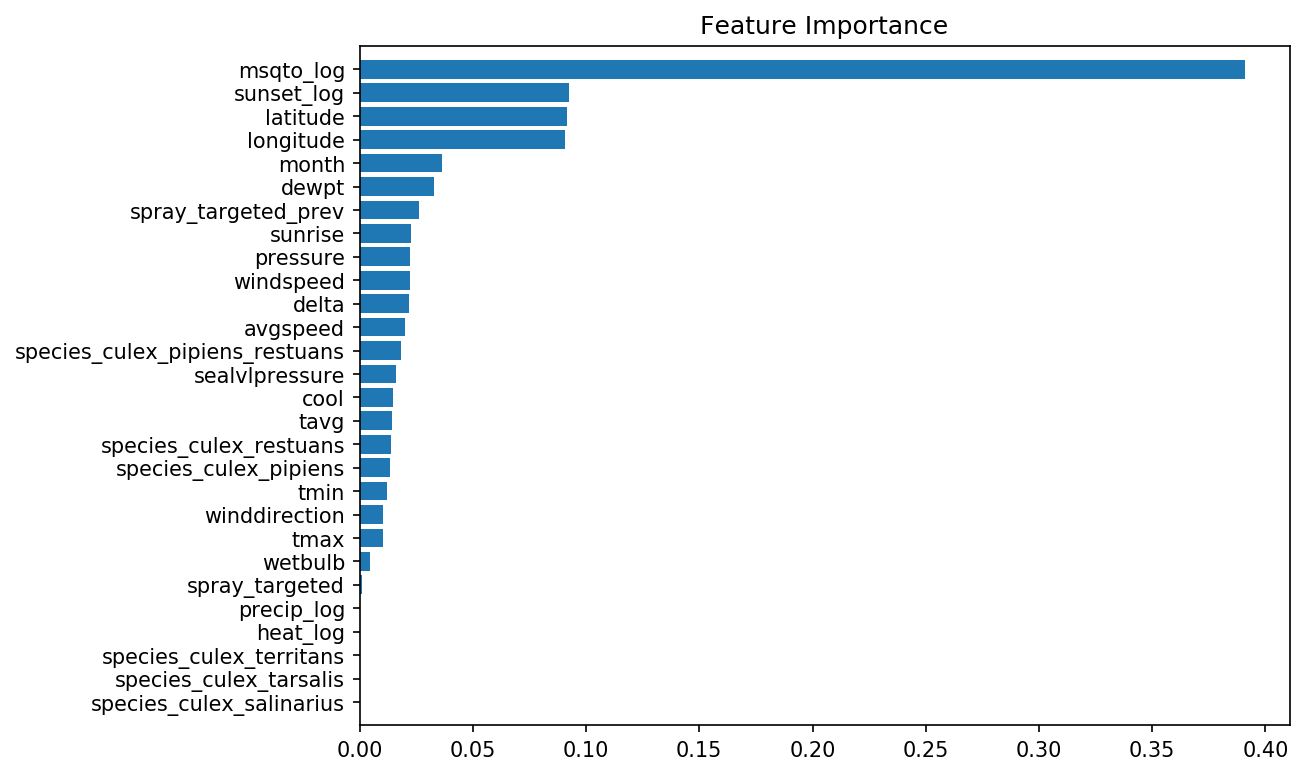

In [73]:
plot_feature_importance(X_rsmpl_train, y_rsmpl_train,forest_rsearch.best_estimator_,X_col_log[1:])

In [29]:
forest_params = {'n_estimators': [20,40,60,80],
               'max_depth': [None,80,90,100],
               'min_samples_split': [2,3],
               'min_samples_leaf': [1,2,3]}

forest_gsearch = GridSearchCV(forest_model,forest_params,cv=5,scoring=['recall','accuracy'],n_jobs=-1,refit='recall')
forest_gsearch.fit(X_rsmpl_train,y_rsmpl_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [20, 40, 60, 80], 'max_depth': [None, 80, 90, 100], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit='recall', return_train_score='warn',
       scoring=['recall', 'accuracy'], verbose=0)

In [30]:
get_param_metrics(X_rsmpl_train,y_rsmpl_train,forest_gsearch)

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 60}
{'accuracy': 0.9999, 'f1': 0.9999, 'precision': 1.0, 'recall': 0.9998}
{'accuracy': [0.9279, 0.9653, 0.963, 0.9657, 0.9629],
 'f1': [0.928, 0.9637, 0.9635, 0.9675, 0.9632],
 'precision': [0.9318, 0.9461, 0.9428, 0.9434, 0.9408],
 'recall': [0.9213, 0.9844, 0.986, 0.9867, 0.9899]}


44, 0.9747427502338635
std = 0.001810202102817847


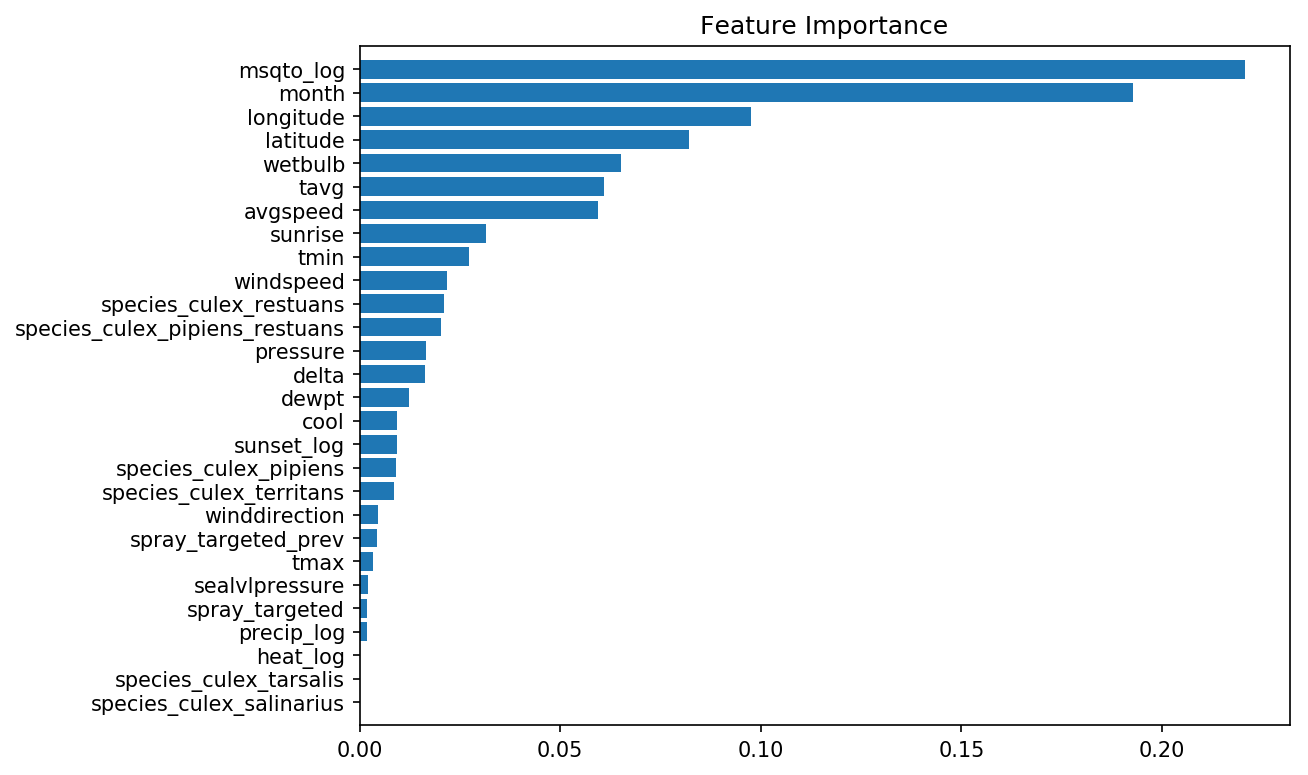

In [74]:
plot_feature_importance(X_rsmpl_train, y_rsmpl_train,forest_gsearch.best_estimator_,X_col_log[1:])

In [121]:
pca = pickle.load(open('pickles/pca_10.pkl','rb'))
pca_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(np.round(pca_var,3)>=0.995)[0][0]

In [122]:
pcaforest_model = pickle.load(open('pickles/pcaforest_10.pkl', 'rb'))

In [125]:
forest_params = {'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__min_samples_leaf': min_samples_leaf}

pcaforest_rsearch = RandomizedSearchCV(pcaforest_model,forest_params,cv=5,scoring=['recall','accuracy'],n_iter=100,random_state=42,n_jobs=-1,refit='recall')
pcaforest_rsearch.fit(X_rsmpl_train,y_rsmpl_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_node...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'randomforestclassifier__n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100], 'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'randomforestclassifier__min_samples_split': [2, 5, 10, 50], 'randomforestclassifier__min_samples_leaf': [1, 2, 4, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit='recall',
          return_train_score='warn', scoring=['recall', 

In [157]:
get_param_metrics(X_rsmpl_train,y_rsmpl_train,pcaforest_rsearch)

{'randomforestclassifier__max_depth': 100,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 60}
{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}
{'accuracy': [0.9474, 0.9583, 0.9548, 0.9579, 0.9493],
 'f1': [0.946, 0.9596, 0.9525, 0.9596, 0.9494],
 'precision': [0.9269, 0.9401, 0.9319, 0.9389, 0.927],
 'recall': [0.9712, 0.9836, 0.986, 0.9813, 0.9805]}


In [194]:
forest_params = {'randomforestclassifier__n_estimators': [50,60,70],
               'randomforestclassifier__max_depth': [90,100,110,None],
               'randomforestclassifier__min_samples_split': [2,3],
               'randomforestclassifier__min_samples_leaf': [1,2]}

pcaforest_gsearch = GridSearchCV(pcaforest_model,forest_params,cv=5,scoring=['recall','accuracy'],n_jobs=-1,refit='recall')
pcaforest_gsearch.fit(X_rsmpl_train,y_rsmpl_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_node...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'randomforestclassifier__n_estimators': [50, 60, 70], 'randomforestclassifier__max_depth': [90, 100, 110, None], 'randomforestclassifier__min_samples_split': [2, 3], 'randomforestclassifier__min_samples_leaf': [1, 2]},
       pre_dispatch='2*n_jobs', refit='recall', return_train_score='warn',
       scoring=['recall', 'accuracy'], verbose=0)

In [195]:
get_param_metrics(X_rsmpl_train,y_rsmpl_train,pcaforest_gsearch)

{'randomforestclassifier__max_depth': 100,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 70}
{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}
{'accuracy': [0.9427, 0.9606, 0.9544, 0.9571, 0.9505],
 'f1': [0.9436, 0.9608, 0.956, 0.9578, 0.9539],
 'precision': [0.9284, 0.9411, 0.928, 0.9395, 0.9227],
 'recall': [0.9688, 0.9813, 0.9852, 0.979, 0.9821]}


To ID feature importances from PCA + random forest pipeline - for each feature_importances_ from top 5 in random forest, get abs from corresponding PCA features, then select top N features from those

In [217]:
pca_extract = pcaforest_gsearch.best_estimator_.get_params()['steps'][0][1]
forest_extract = pcaforest_gsearch.best_estimator_.get_params()['steps'][1][1]

In [230]:
# indices of top 5 feature importances for PCA features and approximate corresponding importance from original features
pca_indices = np.argsort(-forest_extract.feature_importances_)[:5]
forest_importances = np.sum(np.abs(pca_extract.components_[indices]),axis=0)

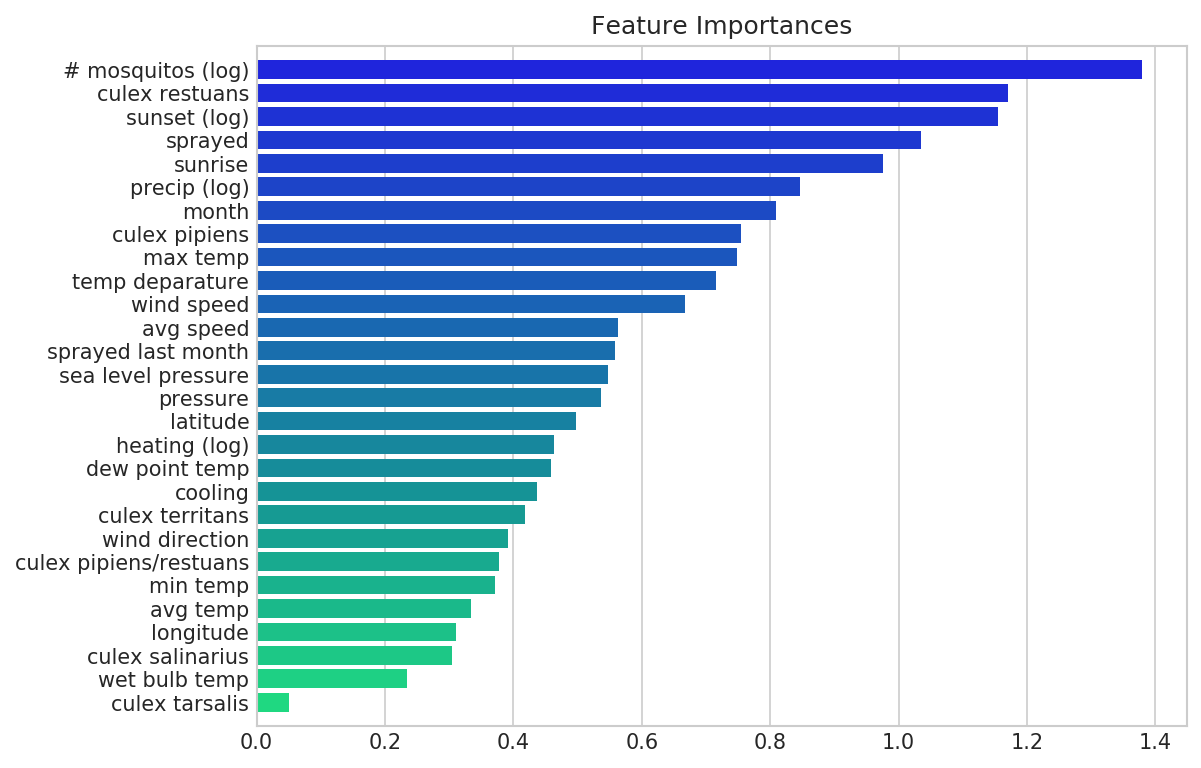

In [306]:
feature_names = ['month', 'latitude', 'longitude', '# mosquitos (log)', 'max temp', 'min temp',
 'avg temp', 'temp deparature', 'dew point temp', 'wet bulb temp', 'heating (log)', 'cooling',
 'sunrise', 'sunset (log)', 'precip (log)', 'pressure', 'sea level pressure', 'wind speed', 'wind direction',
 'avg speed', 'sprayed last month', 'sprayed', 'culex pipiens', 'culex pipiens/restuans', 'culex restuans',
 'culex salinarius', 'culex tarsalis', 'culex territans']

indices = np.argsort(forest_importances)
data = {'indices':forest_importances[indices],'features':[feature_names[i] for i in indices]}
plt.figure(figsize=(8,6),dpi=150)
sns.set_style("whitegrid")
sns.barplot(x='indices', y='features',data=data,palette='winter_r')
plt.title('Feature Importances')
plt.ylim([-1, len(feature_names)]);

In [27]:
forest_scores = np.array([est.score(pca_extract.transform(X_rsmpl_train),y_rsmpl_train) for est in forest_extract.estimators_])
forest_best = np.argmax(forest_scores)

export_graphviz(forest_model.estimators_[forest_best],out_file='images/pcaforest_best_tree.dot',max_depth=4,feature_names=X_col_log[1:])
!dot -Tpng images/pcaforest_best_tree.dot -o images/pcaforest_best_tree.png

![images/pcaforest_best_tree](images/pcaforest_best_tree.png)

In [23]:
pcalog_model = make_pipeline(PCA(n_components=n_components),LogisticRegression())
log_params = {'logisticregression__penalty':['l1','l2'],
              'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'logisticregression__fit_intercept': [True,False]}
pcalog_gsearch = GridSearchCV(pcalog_model,log_params,cv=5,scoring=['recall','accuracy'],n_jobs=-1,refit='recall')
pcalog_gsearch.fit(X_rsmpl_train,y_rsmpl_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'logisticregression__fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit='recall', return_train_score='warn',
       scoring=['recall', 'accuracy'], verbose=0)

In [24]:
get_param_metrics(X_rsmpl_train,y_rsmpl_train,pcalog_gsearch)

{'logisticregression__C': 10,
 'logisticregression__fit_intercept': False,
 'logisticregression__penalty': 'l1'}
{'accuracy': 0.8213, 'f1': 0.8343, 'precision': 0.7779, 'recall': 0.8994}
{'accuracy': [0.8106, 0.8239, 0.8207, 0.8266, 0.8249],
 'f1': [0.8235, 0.8356, 0.8331, 0.8406, 0.8385],
 'precision': [0.7709, 0.7832, 0.7794, 0.7779, 0.7779],
 'recall': [0.8839, 0.8956, 0.8948, 0.9143, 0.9095]}


In [83]:
# canceled because it took too long
pcasvc_model = make_pipeline(PCA(n_components=n_components),SVC())
svc_params = {'svc__kernel':['rbf','poly'],
              'svc__degree':[2,3,4],
              'svc__gamma':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }
pcasvc_rsearch = RandomizedSearchCV(pcasvc_model,svc_params,cv=5,scoring=['recall','accuracy'],n_iter=100,random_state=42,n_jobs=-1,refit='recall')
pcasvc_rsearch.fit(X_rsmpl_train,y_rsmpl_train)

KeyboardInterrupt: 

Random forest is still the best scoring model.

In [97]:
pickle.dump(forest_rsearch.best_estimator_,open('pickles/forest_rsearch.pkl', 'wb'))
pickle.dump(forest_gsearch.best_estimator_,open('pickles/forest_gsearch.pkl', 'wb'))
pickle.dump(pcaforest_gsearch.best_estimator_,open('pickles/pcaforest_gsearch.pkl','wb'))

forest
training scores:
{'accuracy': 0.9991, 'f1': 0.9991, 'precision': 0.9992, 'recall': 0.9991}
cv scores:
{'accuracy': [0.9263, 0.9626, 0.9645, 0.9653, 0.9629],
 'f1': [0.9266, 0.9689, 0.9585, 0.9672, 0.9635],
 'precision': [0.9392, 0.9486, 0.9403, 0.9439, 0.9351],
 'recall': [0.9182, 0.9758, 0.979, 0.986, 0.9891]}




<Figure size 2100x1120 with 0 Axes>

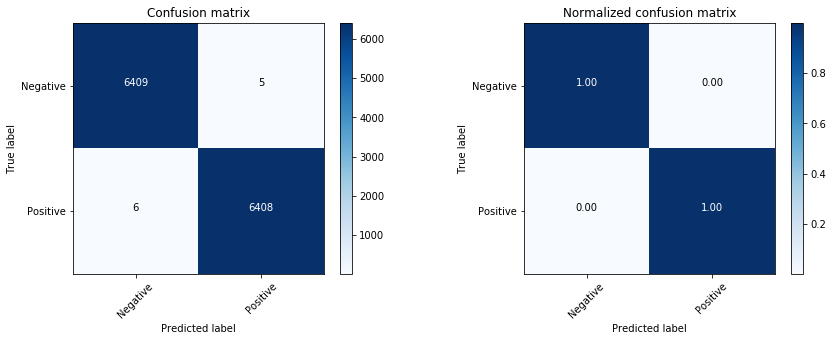

pcaforest
training scores:
{'accuracy': 0.9994, 'f1': 0.9994, 'precision': 0.9988, 'recall': 1.0}
cv scores:
{'accuracy': [0.9435, 0.9583, 0.9517, 0.9583, 0.9489],
 'f1': [0.9452, 0.96, 0.9565, 0.9605, 0.952],
 'precision': [0.9257, 0.941, 0.9258, 0.9373, 0.9238],
 'recall': [0.9712, 0.9829, 0.9821, 0.9813, 0.9828]}




<Figure size 2100x1120 with 0 Axes>

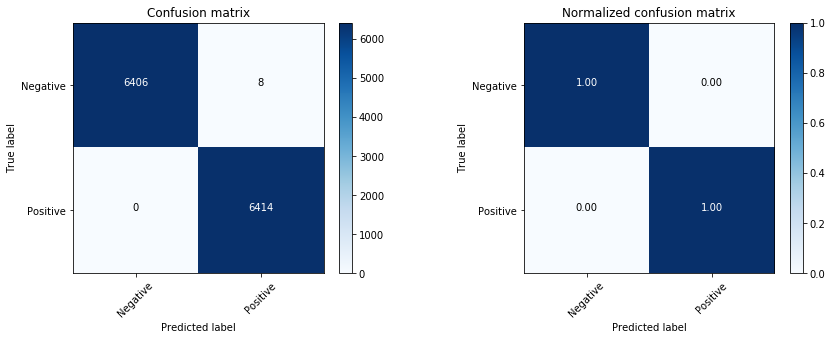

forest_gsearch
training scores:
{'accuracy': 0.9999, 'f1': 0.9999, 'precision': 1.0, 'recall': 0.9998}
cv scores:
{'accuracy': [0.9263, 0.9661, 0.9599, 0.963, 0.9629],
 'f1': [0.9302, 0.9664, 0.9635, 0.968, 0.9618],
 'precision': [0.9352, 0.9482, 0.9371, 0.9497, 0.9373],
 'recall': [0.9221, 0.9797, 0.9875, 0.9844, 0.9899]}




<Figure size 2100x1120 with 0 Axes>

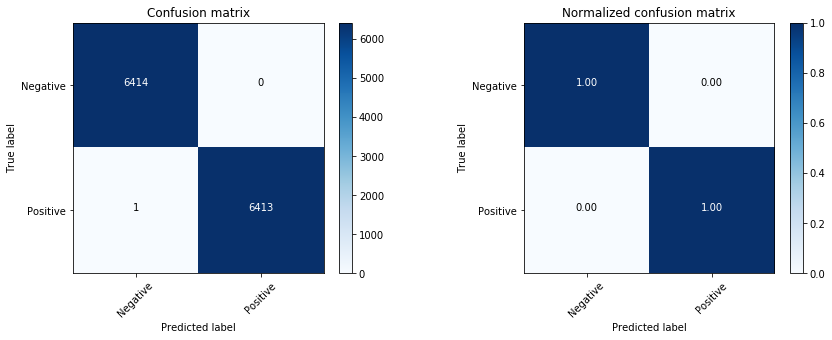

In [191]:
model_dict = {'forest':forest_model,'pcaforest':pcaforest_gsearch.best_estimator_,'forest_gsearch':forest_gsearch.best_estimator_}

model_selection_functions.run_model_comparison(X_rsmpl_train,y_rsmpl_train,model_dict)

Based on the scores and feature importances, the best model to use from the above three random forest classification models is the PCA + random forest because there are no false negatives. Let's see how well the model performs against the test data.

In [316]:
# average of pcaforest recall scores
np.mean(np.array([0.9712, 0.9829, 0.9821, 0.9813, 0.9828]))

0.9800599999999999

In [314]:
# average of pcaforest accuracy scores
np.mean(np.array([0.9435, 0.9583, 0.9517, 0.9583, 0.9489]))

0.95214

<Figure size 2100x1120 with 0 Axes>

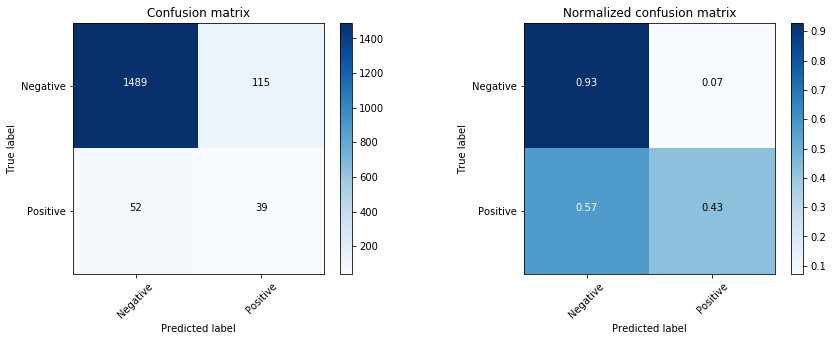

In [204]:
y_pred = pcaforest_gsearch.best_estimator_.predict(X_test_s)
cf_matrix = metrics.confusion_matrix(df_test_s[df_test_s.columns[-1]],y_pred)
plot_confusion_matrix(cf_matrix,classes=['Negative','Positive'])

<Figure size 2100x1120 with 0 Axes>

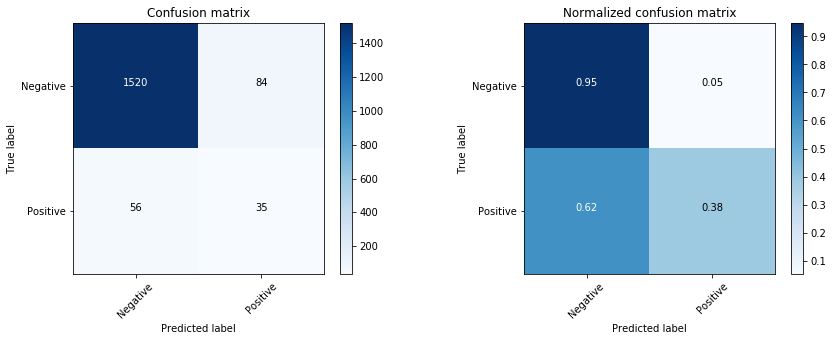

In [52]:
# Interesting, looks like oversampling to ratio = 1 caused the model to be overfitted to the training set. 
# Compare with the initial trial model for ratio 0.5:
forest_model_05 = pickle.load(open('pickles/randomforest_05.pkl', 'rb'))
y_pred_05 = tmp_model.predict(X_test_s)
cf_matrix_05 = metrics.confusion_matrix(df_test_s[df_test_s.columns[-1]],y_pred)
plot_confusion_matrix(cf_matrix_05,classes=['Negative','Positive'])

In [196]:
X_rsmpl_05 = pickle.load(open('pickles/X_rsmpl_train_05.pkl', 'rb'))
y_rsmpl_05 = pickle.load(open('pickles/y_rsmpl_train_05.pkl', 'rb'))
pcaforest_05 = pickle.load(open('pickles/pcaforest_05.pkl', 'rb'))

In [55]:
n_estimators = [int(x) for x in np.arange(20,110,10)]
max_depth = [int(x) for x in np.arange(10,110,10)]+[None]
min_samples_split = [2, 5, 10, 50]
min_samples_leaf = [1, 2, 4, 10]

forest_params = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

forest_rsearch_05 = RandomizedSearchCV(forest_model_05,forest_params,cv=5,scoring=['recall','accuracy'],n_iter=100,random_state=42,n_jobs=-1,refit='recall')
forest_rsearch_05.fit(X_rsmpl_05,y_rsmpl_05)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10, 50], 'min_samples_leaf': [1, 2, 4, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit='recall',
          return_train_score='warn', scoring=['recall', 'accuracy'],
          verbose=0)

In [56]:
get_param_metrics(X_rsmpl_05,y_rsmpl_05,forest_rsearch_05)

{'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}
{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}
{'accuracy': [0.906, 0.9584, 0.9584, 0.9569, 0.9553],
 'f1': [0.8476, 0.9408, 0.9379, 0.9385, 0.93],
 'precision': [0.8874, 0.9195, 0.9007, 0.9116, 0.9074],
 'recall': [0.81, 0.9595, 0.9813, 0.9594, 0.9626]}


71, 0.9693379066625091
std = 0.0019867311934692895


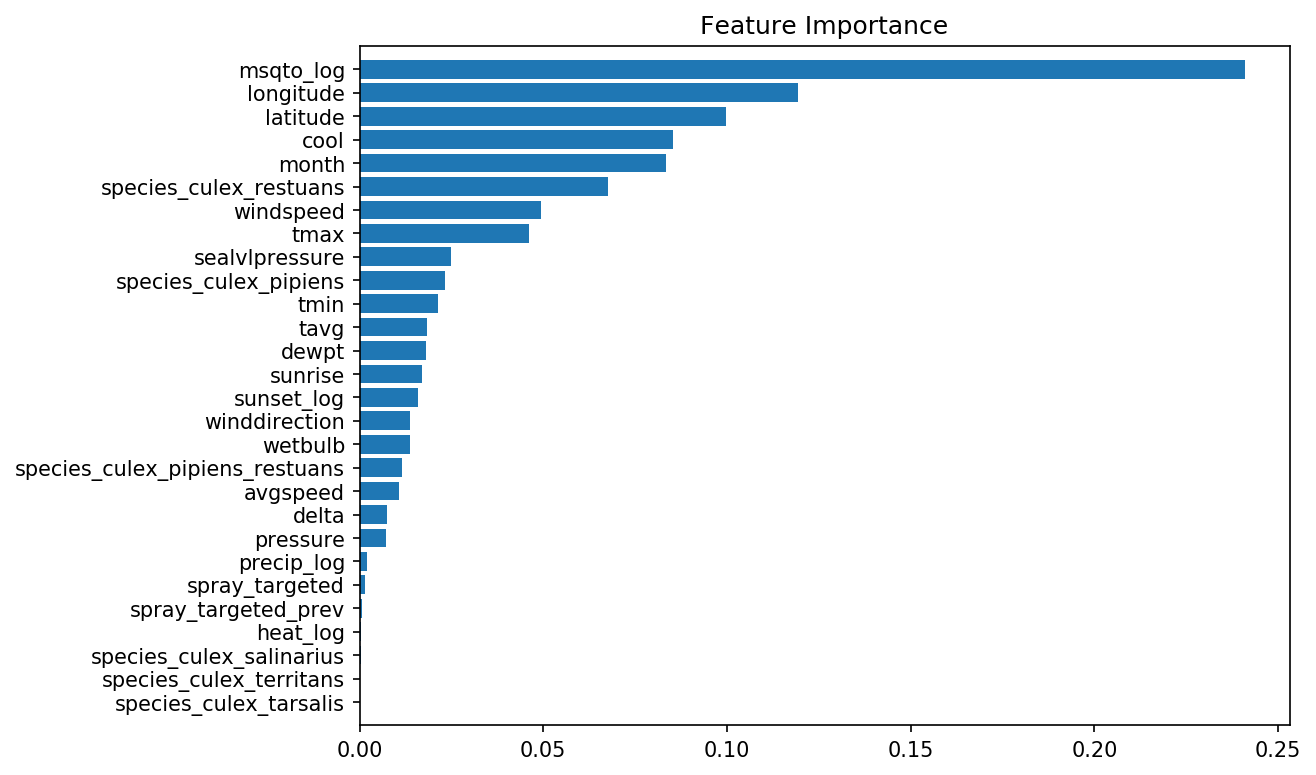

In [75]:
plot_feature_importance(X_rsmpl_05,y_rsmpl_05,forest_rsearch_05.best_estimator_,X_col_log[1:])

In [58]:
forest_params_05 = {'n_estimators': [80,90,100,110],
               'max_depth': [None,30,40,50],
               'min_samples_split': [2,3],
               'min_samples_leaf': [1,2]}

forest_gsearch_05 = GridSearchCV(forest_model_05,forest_params,cv=5,scoring=['recall','accuracy'],n_jobs=-1,refit='recall')
forest_gsearch_05.fit(X_rsmpl_05,y_rsmpl_05)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10, 50], 'min_samples_leaf': [1, 2, 4, 10]},
       pre_dispatch='2*n_jobs', refit='recall', return_train_score='warn',
       scoring=['recall', 'accuracy'], verbose=0)

In [59]:
get_param_metrics(X_rsmpl_05,y_rsmpl_05,forest_gsearch_05)

{'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}
{'accuracy': 0.9998, 'f1': 0.9997, 'precision': 0.9997, 'recall': 0.9997}
{'accuracy': [0.8997, 0.9564, 0.9569, 0.9553, 0.9511],
 'f1': [0.8541, 0.9399, 0.9351, 0.9362, 0.9339],
 'precision': [0.8906, 0.918, 0.9076, 0.9153, 0.9006],
 'recall': [0.8037, 0.9611, 0.9782, 0.9579, 0.9594]}


3, 0.9686103315663652
std = 0.0020768215824935703


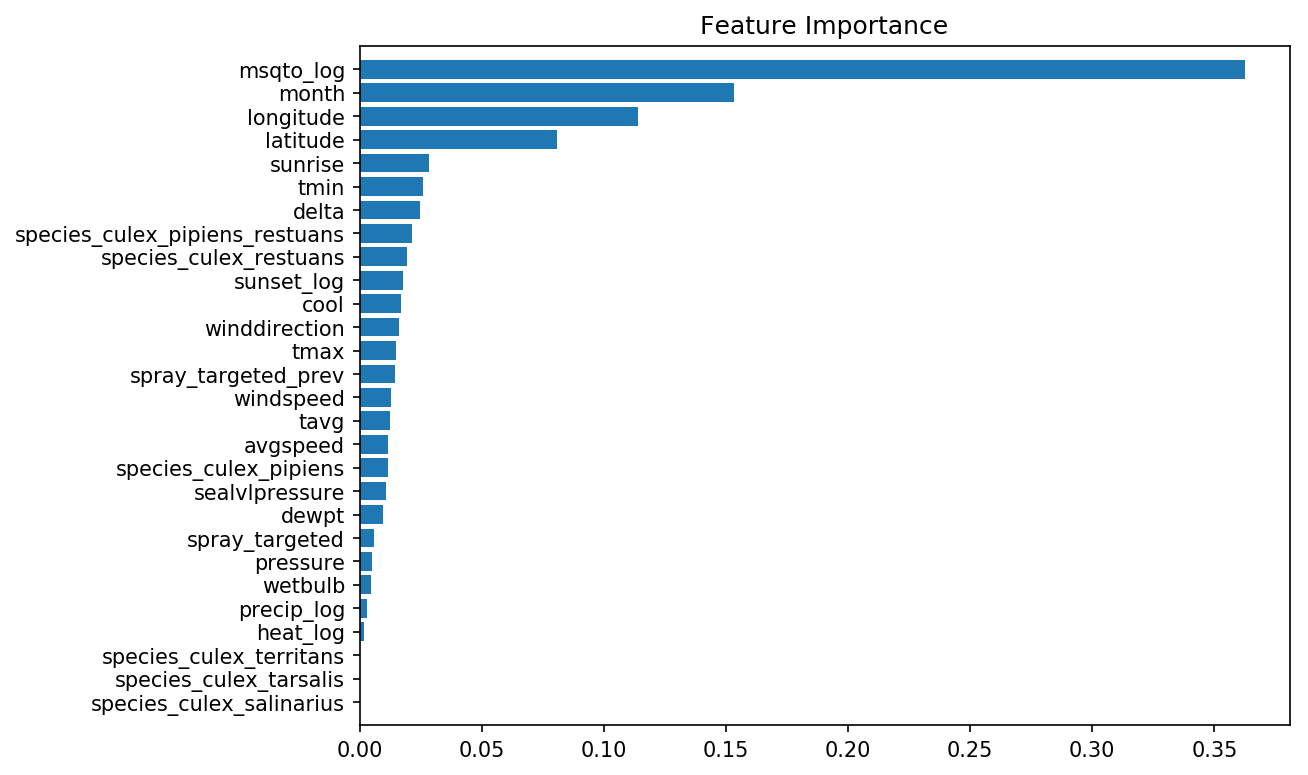

In [76]:
plot_feature_importance(X_rsmpl_05,y_rsmpl_05,forest_gsearch_05.best_estimator_,X_col_log[1:])

In [197]:
forest_params = {'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__min_samples_leaf': min_samples_leaf}

pcaforest_r_05 = RandomizedSearchCV(pcaforest_05,forest_params,cv=5,scoring=['recall','accuracy'],n_iter=100,random_state=42,n_jobs=-1,refit='recall')
pcaforest_r_05.fit(X_rsmpl_05,y_rsmpl_05)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_node...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'randomforestclassifier__n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100], 'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'randomforestclassifier__min_samples_split': [2, 5, 10, 50], 'randomforestclassifier__min_samples_leaf': [1, 2, 4, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit='recall',
          return_train_score='warn', scoring=['recall', 

In [200]:
get_param_metrics(X_rsmpl_05,y_rsmpl_05,pcaforest_r_05)

{'randomforestclassifier__max_depth': 50,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 90}
{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}
{'accuracy': [0.919, 0.946, 0.9428, 0.9423, 0.9267],
 'f1': [0.8816, 0.9162, 0.9164, 0.9125, 0.8993],
 'precision': [0.883, 0.9023, 0.8945, 0.8897, 0.8809],
 'recall': [0.8816, 0.9393, 0.9438, 0.9423, 0.8986]}


In [205]:
forest_params_05 = {'n_estimators': [80,90,100],
               'max_depth': [None,40,50,60],
               'min_samples_split': [2,3],
               'min_samples_leaf': [1,2]}

pcaforest_g_05 = GridSearchCV(pcaforest_05,forest_params,cv=5,scoring=['recall','accuracy'],n_jobs=-1,refit='recall')
pcaforest_g_05.fit(X_rsmpl_05,y_rsmpl_05)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_node...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'randomforestclassifier__n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100], 'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'randomforestclassifier__min_samples_split': [2, 5, 10, 50], 'randomforestclassifier__min_samples_leaf': [1, 2, 4, 10]},
       pre_dispatch='2*n_jobs', refit='recall', return_train_score='warn',
       scoring=['recall', 'accuracy'], verbose=0)

In [206]:
get_param_metrics(X_rsmpl_05,y_rsmpl_05,pcaforest_g_05)

{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 80}
{'accuracy': 0.988, 'f1': 0.9824, 'precision': 0.9654, 'recall': 1.0}
{'accuracy': [0.9169, 0.9439, 0.9361, 0.9402, 0.9277],
 'f1': [0.8795, 0.9128, 0.9143, 0.9106, 0.9002],
 'precision': [0.8586, 0.8892, 0.8765, 0.8783, 0.8737],
 'recall': [0.8847, 0.9346, 0.9501, 0.947, 0.9126]}


<Figure size 2100x1120 with 0 Axes>

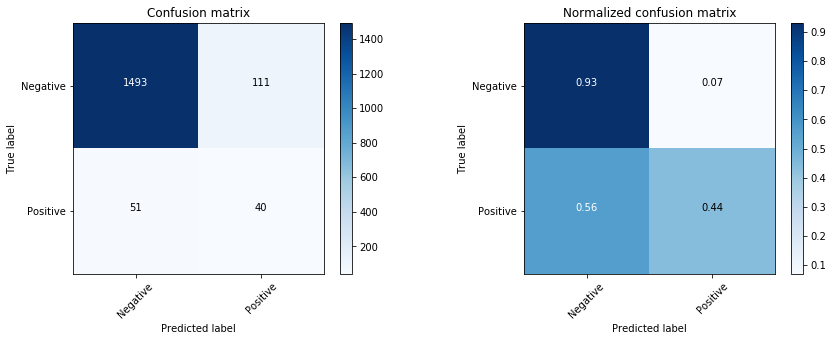

In [208]:
# so, not much better when changing resample ratio
y_pred_05 = pcaforest_g_05.best_estimator_.predict(X_test_s)
cf_matrix = metrics.confusion_matrix(df_test_s[df_test_s.columns[-1]],y_pred_05)
plot_confusion_matrix(cf_matrix,classes=['Negative','Positive'])